In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:


sheet_names = ['UserDetails.csv', 'CookingSessions.csv', 'OrderDetails.csv']

data = pd.read_excel('Assignment.xlsx', sheet_name=sheet_names)

# Access individual DataFrames
UserDetails = data['UserDetails.csv']
Sessions = data['CookingSessions.csv']
Orders = data['OrderDetails.csv']



In [71]:
UserDetails.head()

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
1,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8
2,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15
3,U004,David Brown,27,San Francisco,2023-04-05,444-333-2222,david@email.com,Dinner,10
4,U005,Emma White,30,Seattle,2023-05-22,777-888-9999,emma@email.com,Lunch,9


In [20]:
Sessions.head()

,Session ID,User ID,Dish Name,Meal Type,Session Start,Session End,Duration (mins),Session Rating
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0
2,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30:00,2024-12-02 20:10:00,40,4.8
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30,4.2
4,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00:00,2024-12-03 13:15:00,15,4.7


In [47]:
Orders.head()

,Order ID,User ID,Order Date,Meal Type,Dish Name,Order Status,Amount (USD),Time of Day,Rating,Session ID
0,1001,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
1,1002,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0,S002
2,1003,U003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,NaN,S003
3,1004,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004
4,1005,U004,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.0,S005


In [26]:
# Check for missing values
print(UserDetails.isnull().sum())


User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
dtype: int64


In [28]:
print(Sessions.isnull().sum())


Session ID         0
User ID            0
Dish Name          0
Meal Type          0
Session Start      0
Session End        0
Duration (mins)    0
Session Rating     0
dtype: int64


In [30]:
print(Orders.isnull().sum())

Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          2
Session ID      0
dtype: int64


In [33]:
UserDetails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            10 non-null     object        
 1   User Name          10 non-null     object        
 2   Age                10 non-null     int64         
 3   Location           10 non-null     object        
 4   Registration Date  10 non-null     datetime64[ns]
 5   Phone              10 non-null     object        
 6   Email              10 non-null     object        
 7   Favorite Meal      10 non-null     object        
 8   Total Orders       10 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 852.0+ bytes


In [35]:
Sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Session ID       16 non-null     object        
 1   User ID          16 non-null     object        
 2   Dish Name        16 non-null     object        
 3   Meal Type        16 non-null     object        
 4   Session Start    16 non-null     datetime64[ns]
 5   Session End      16 non-null     datetime64[ns]
 6   Duration (mins)  16 non-null     int64         
 7   Session Rating   16 non-null     float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 1.1+ KB


In [37]:
Orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      16 non-null     int64         
 1   User ID       16 non-null     object        
 2   Order Date    16 non-null     datetime64[ns]
 3   Meal Type     16 non-null     object        
 4   Dish Name     16 non-null     object        
 5   Order Status  16 non-null     object        
 6   Amount (USD)  16 non-null     float64       
 7   Time of Day   16 non-null     object        
 8   Rating        14 non-null     float64       
 9   Session ID    16 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 1.4+ KB


### The Rating column in the Orders dataset contains two null values. These null values will be imputed using the column's mean to maintain data consistency and accuracy.








In [73]:
Orders['Rating'] = Orders['Rating'].fillna(mean_rating)

In [75]:
# to confirm null values filled
print(Orders['Rating'].isnull().sum())

0


In [79]:
merged = pd.merge(UserDetails, Sessions, on='User ID', how='left')


In [81]:
merged_data = pd.merge(merged, Orders, on='User ID', how='left')

In [83]:
merged_data.head()

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders,Session ID_x,...,Session Rating,Order ID,Order Date,Meal Type_y,Dish Name_y,Order Status,Amount (USD),Time of Day,Rating,Session ID_y
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S001,...,4.5,1001.0,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
1,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S001,...,4.5,1004.0,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004
2,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S001,...,4.5,1009.0,2024-12-05,Dinner,Grilled Chicken,Completed,12.0,Night,5.0,S009
3,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S004,...,4.2,1001.0,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
4,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S004,...,4.2,1004.0,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004


In [87]:
merged_data.columns

Index(['User ID', 'User Name', 'Age', 'Location', 'Registration Date', 'Phone',
       'Email', 'Favorite Meal', 'Total Orders', 'Session ID_x', 'Dish Name_x',
       'Meal Type_x', 'Session Start', 'Session End', 'Duration (mins)',
       'Session Rating', 'Order ID', 'Order Date', 'Meal Type_y',
       'Dish Name_y', 'Order Status', 'Amount (USD)', 'Time of Day', 'Rating',
       'Session ID_y'],
      dtype='object')

In [93]:
columns_to_keep = [
    'User ID', 'User Name', 'Age', 'Location',
    'Order ID', 'Order Date','Total Orders', 'Favorite Meal', 'Dish Name_y',
    'Order Status', 'Amount (USD)', 'Time of Day', 'Rating',
    'Session ID_y', 'Session Rating'
]

filtered_data = merged_data[columns_to_keep]




In [95]:
filtered_data.head()

,User ID,User Name,Age,Location,Order ID,Order Date,Total Orders,Favorite Meal,Dish Name_y,Order Status,Amount (USD),Time of Day,Rating,Session ID_y,Session Rating
0,U001,Alice Johnson,28,New York,1001.0,2024-12-01,12,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001,4.5
1,U001,Alice Johnson,28,New York,1004.0,2024-12-02,12,Dinner,Pancakes,Completed,8.0,Morning,4.0,S004,4.5
2,U001,Alice Johnson,28,New York,1009.0,2024-12-05,12,Dinner,Grilled Chicken,Completed,12.0,Night,5.0,S009,4.5
3,U001,Alice Johnson,28,New York,1001.0,2024-12-01,12,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001,4.2
4,U001,Alice Johnson,28,New York,1004.0,2024-12-02,12,Dinner,Pancakes,Completed,8.0,Morning,4.0,S004,4.2


In [97]:
age_distribution = filtered_data['Age'].value_counts()
print(age_distribution)


Age
28    9
35    9
42    9
27    4
30    4
25    1
38    1
31    1
33    1
29    1
Name: count, dtype: int64


Dish Name_y
Spaghetti          9
Grilled Chicken    9
Caesar Salad       7
Pancakes           6
Veggie Burger      4
Oatmeal            3
Name: count, dtype: int64


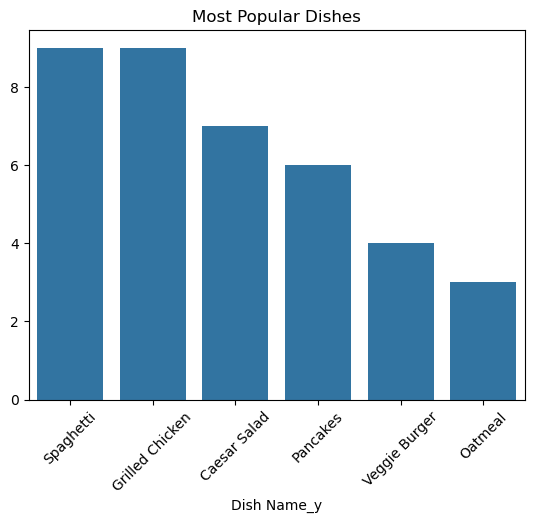

In [101]:
# Popular dishes analysis
popular_dishes = filtered_data['Dish Name_y'].value_counts()
print(popular_dishes)

# Visualizations
sns.barplot(x=popular_dishes.index, y=popular_dishes.values)
plt.title("Most Popular Dishes")
plt.xticks(rotation=45)
plt.show()

Text(0.5, 0, 'Time of Day')

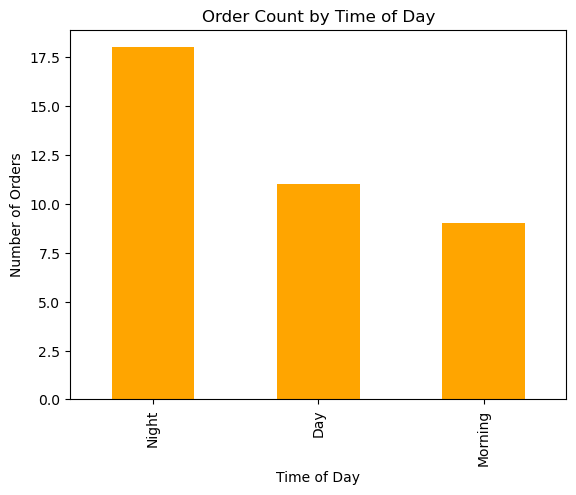

In [117]:
# Time of Day Preferences
time_preferences = filtered_data['Time of Day'].value_counts()

time_preferences.plot(kind='bar', color='orange')
plt.title('Order Count by Time of Day')
plt.ylabel('Number of Orders')
plt.xlabel('Time of Day')

Text(0.5, 0, 'Time of Day')

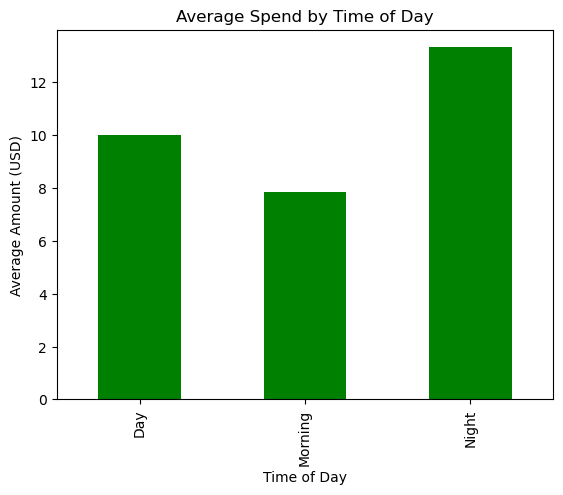

In [121]:
avg_spend = filtered_data.groupby('Time of Day')['Amount (USD)'].mean()

avg_spend.plot(kind='bar', color='green')
plt.title('Average Spend by Time of Day')
plt.ylabel('Average Amount (USD)')
plt.xlabel('Time of Day')



Text(0.5, 0, 'Dish Name')

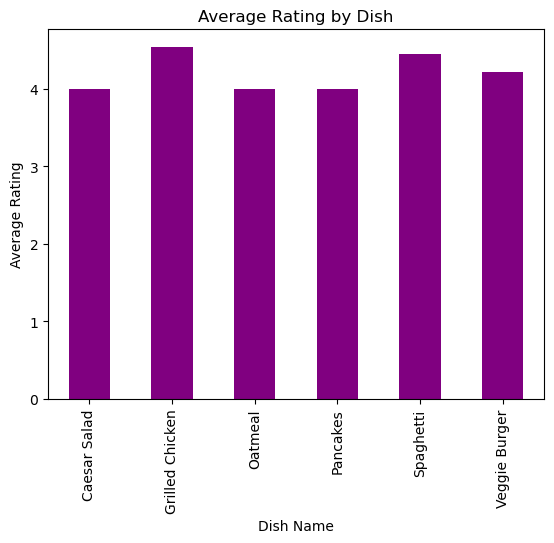

In [125]:
# Ratings Analysis
ratings_by_dish = filtered_data.groupby('Dish Name_y')['Rating'].mean()

ratings_by_dish.plot(kind='bar', color='purple')
plt.title('Average Rating by Dish')
plt.ylabel('Average Rating')
plt.xlabel('Dish Name')

In [133]:
# Repeat Customer Analysis
repeat_customers = filtered_data.groupby('User ID').agg({'Order ID': 'nunique', 'Amount (USD)': 'sum'})
repeat_customers.rename(columns={'Order ID': 'Total Unique Orders', 'Amount (USD)': 'Total Spend'}, inplace=True)

print("Repeat Customer Analysis:")
print(repeat_customers.sort_values('Total Spend', ascending=False))

Repeat Customer Analysis:
         Total Unique Orders  Total Spend
User ID                                  
U001                       3        105.0
U003                       3         96.0
U002                       3         93.0
U005                       2         45.0
U004                       2         43.0
U007                       1         14.0
U006                       1         13.0
U008                       1         11.0
U009                       0          0.0
U010                       0          0.0


C:\Users\malle\AppData\Local\Temp\ipykernel_15212\3450232253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Order Date'] = pd.to_datetime(filtered_data['Order Date'])


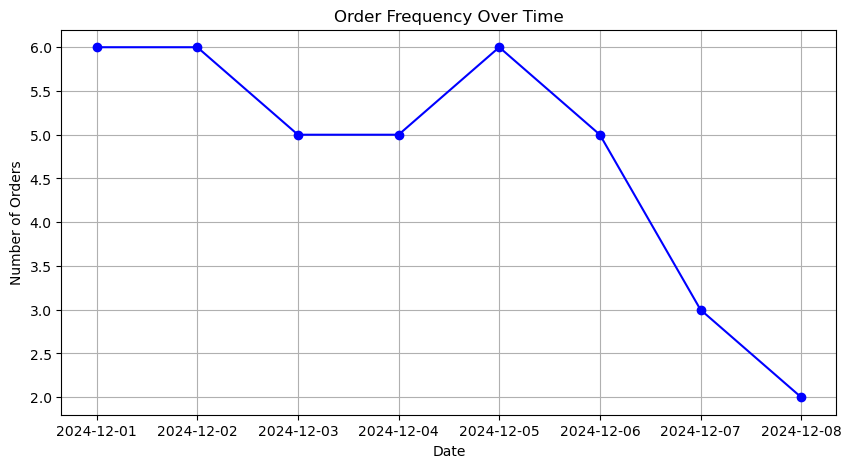

In [139]:

filtered_data['Order Date'] = pd.to_datetime(filtered_data['Order Date'])
order_frequency = filtered_data.groupby(filtered_data['Order Date'].dt.date)['Order ID'].count()

plt.figure(figsize=(10, 5))
order_frequency.plot(marker='o', linestyle='-', color='blue')
plt.title('Order Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

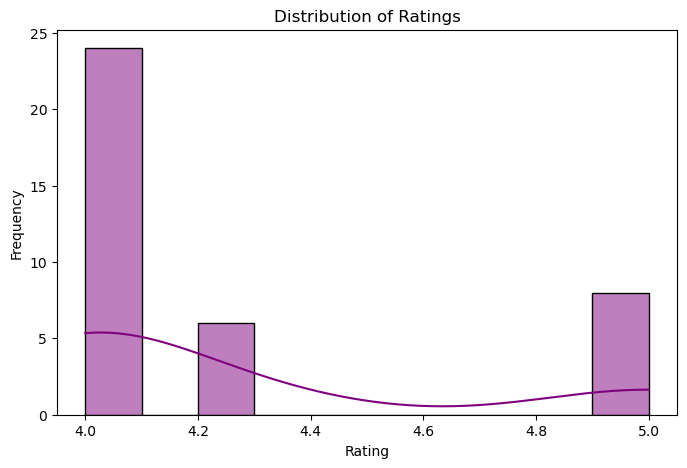

In [141]:
# Ratings Distribution
plt.figure(figsize=(8, 5))
sns.histplot(filtered_data['Rating'], bins=10, kde=True, color='purple')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

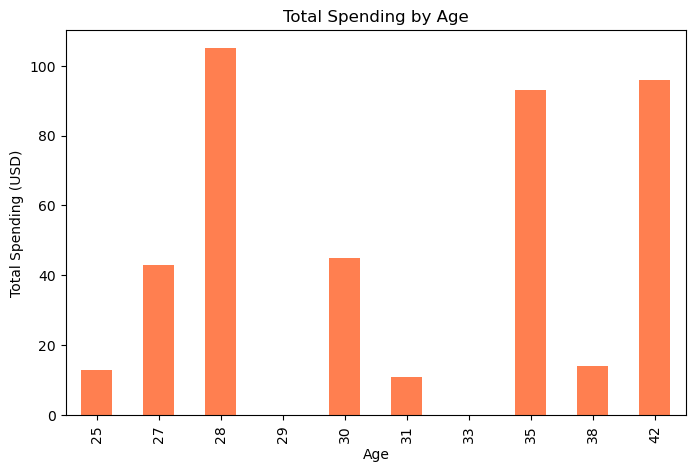

In [145]:
# Age vs Spending Analysis
age_spending = filtered_data.groupby('Age')['Amount (USD)'].sum()

plt.figure(figsize=(8, 5))
age_spending.plot(kind='bar', color='coral')
plt.title('Total Spending by Age')
plt.xlabel('Age')
plt.ylabel('Total Spending (USD)')
plt.show()

In [129]:
# Output Key Insights
print("\nKey Insights:")
print(f"\nPopular Dishes by Revenue:\n")
print(f"\nOrder Count by Time of Day:\n{time_preferences}")
print(f"\nAverage Spend by Time of Day:\n{avg_spend}")
print(f"\nAverage Rating by Dish:\n{ratings_by_dish}")



Key Insights:

Popular Dishes by Revenue:
 Dish Name_y
Spaghetti          9
Grilled Chicken    9
Caesar Salad       7
Pancakes           6
Veggie Burger      4
Oatmeal            3
Name: count, dtype: int64

Order Count by Time of Day:
Time of Day
Night      18
Day        11
Morning     9
Name: count, dtype: int64

Average Spend by Time of Day:
Time of Day
Day        10.000000
Morning     7.833333
Night      13.305556
Name: Amount (USD), dtype: float64

Average Rating by Dish:
Dish Name_y
Caesar Salad       4.000000
Grilled Chicken    4.539683
Oatmeal            4.000000
Pancakes           4.000000
Spaghetti          4.444444
Veggie Burger      4.214286
Name: Rating, dtype: float64


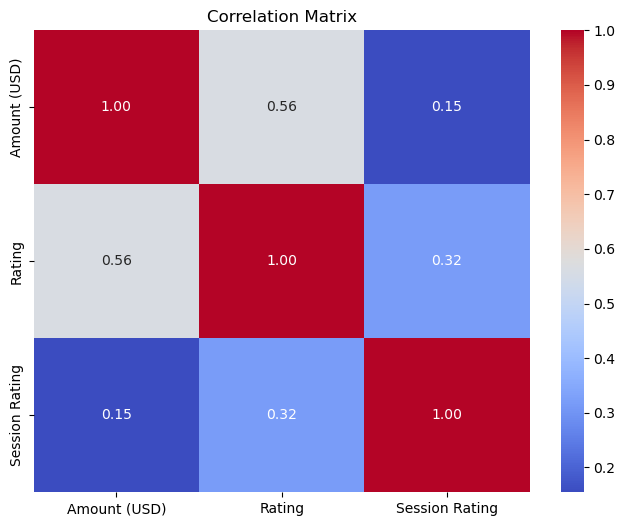

In [147]:
# Correlation Analysis
correlation_matrix = filtered_data[['Amount (USD)', 'Rating', 'Session Rating']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()